## Loading the Libraries

In [450]:
# Importing libraries to use in project
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

# Will use for feature scaling
from sklearn.preprocessing import MinMaxScaler

# Regression Models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Classification Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Will use to implement ANN
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

# To evaluate the model performance
from sklearn import metrics

# To visualize the results
import seaborn as sns
import matplotlib.pyplot as plt

# To save the model
import joblib

In [287]:
# Importing Dataset
dataset = pd.read_csv("Gr_Admission_Predict_Data.csv")
dataset

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


## Loading and Examining the dataset

In [288]:
# Printing the sahpe of the dataset
print(f'Number of Rows in dataset : {dataset.shape[0]}')
print(f'Number of columns in dataset : {dataset.shape[1]}')
print(f'Number of features of Graduate Admission Analysis and Prediction Problem : {dataset.shape[1]-1}')

Number of Rows in dataset : 500
Number of columns in dataset : 9
Number of features of Graduate Admission Analysis and Prediction Problem : 8


In [289]:
# Printing the basic information of dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [290]:
# Examiming the dataset
dataset.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [291]:
# Checking if the dataset has any null values
dataset.isnull()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
495,False,False,False,False,False,False,False,False,False
496,False,False,False,False,False,False,False,False,False
497,False,False,False,False,False,False,False,False,False
498,False,False,False,False,False,False,False,False,False


In [292]:
# Summing up all available null values
dataset.isnull().sum()
# Comments on Result: Here all columns have 0 null values

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [293]:
# Will check if there is any duplicate row in the dataset
dataset.duplicated().sum()

0

In [294]:
# Checking what and all columns we have in dataset
dataset.columns
# Comments on Result: Here, Serial No. column is not relevant with problem 

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [295]:
# Dropping Irrelevent column(Serial No.) from Dataset
dataset = dataset.drop("Serial No.", axis = 1)
dataset

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [541]:
# To see what final columns available in dataset
dataset.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

        GRE Score
count  500.000000
mean   316.472000
std     11.295148
min    290.000000
25%    308.000000
50%    317.000000
75%    325.000000
max    340.000000


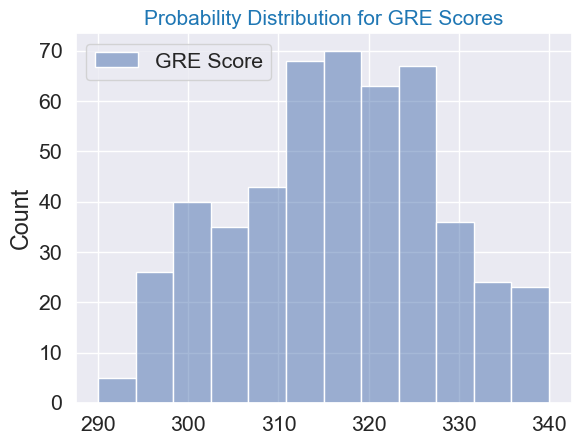

In [597]:
# Analyzing GRE Score feature
GRE_Score = pd.DataFrame(dataset['GRE Score'])

print(f'{GRE_Score.describe()}')

sns.histplot(GRE_Score).set_title('Probability Distribution for GRE Scores', color='#1f77b4', size='15')
plt.show()

# Comments on Result : we have GRE Score between 290 to 340 and the data is having mostly proper distribution

       TOEFL Score
count   500.000000
mean    107.192000
std       6.081868
min      92.000000
25%     103.000000
50%     107.000000
75%     112.000000
max     120.000000


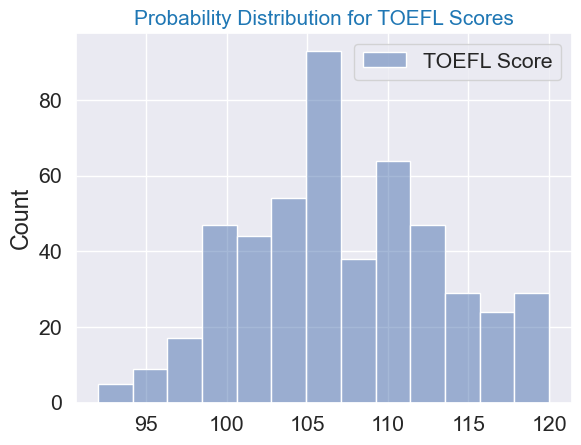

In [596]:
# Analyzing TOEFL Score feature
TOEFL_Score = pd.DataFrame(dataset['TOEFL Score'])

print(f'{TOEFL_Score.describe()}')

sns.histplot(TOEFL_Score).set_title('Probability Distribution for TOEFL Scores', color='#1f77b4', size='15')
plt.show()

# Comments on Result : we have TOEFL Score between 92 to 120 and the data is having more values in range 105 to 107 than others

   University Rating
1                 34
2                126
3                162
4                105
5                 73


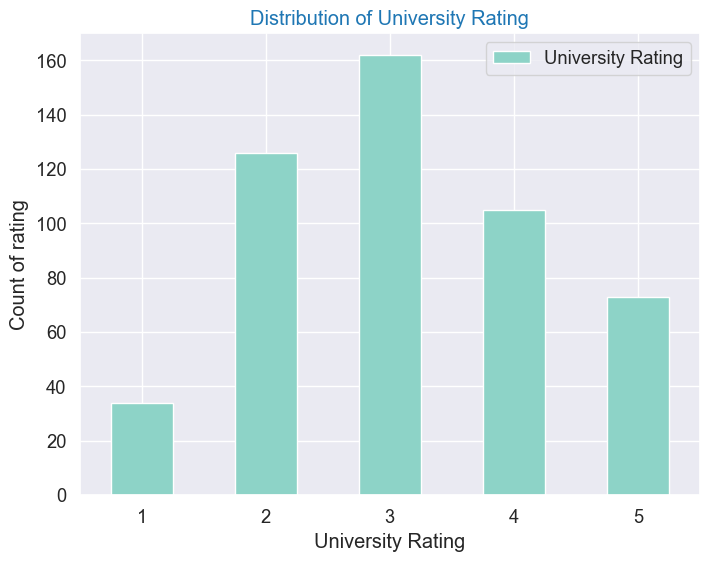

In [629]:
# Analyzing University Rating
rating = pd.DataFrame(dataset["University Rating"].value_counts().sort_index())
print(rating)

sns.set(font_scale=1.2)
rating.plot(kind='bar', figsize=(8, 6), rot=0, colormap = 'Set3')
plt.xlabel("University Rating", labelpad=5)
plt.ylabel("Count of rating", labelpad=5)
plt.title("Distribution of University Rating", color = '#1f77b4');

# Comments on Result : University Rating is also mostly evenly distributed between 5 levels describing 1 as high level and 5 as low level

     SOP
1.0    6
1.5   25
2.0   43
2.5   64
3.0   80
3.5   88
4.0   89
4.5   63
5.0   42


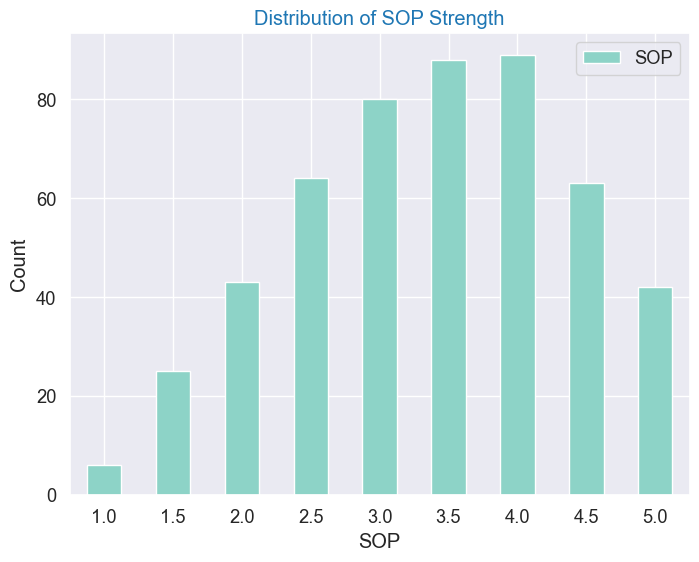

In [638]:
# Analyzing Statement of Purpose(SOP) Strength
SOP = pd.DataFrame(dataset["SOP"].value_counts().sort_index())
print(SOP)

sns.set(font_scale=1.2)
SOP.plot(kind='bar', figsize=(8, 6), rot=0, colormap = 'Set3')
plt.xlabel("SOP", labelpad=5)
plt.ylabel("Count", labelpad=5)
plt.title("Distribution of SOP Strength", color = '#1f77b4');

# Comments on Result : Distribution of SOP Strength is also mostly proper and having most values between 2.5 to 4.5

     LOR 
1.0     1
1.5    11
2.0    46
2.5    50
3.0    99
3.5    86
4.0    94
4.5    63
5.0    50


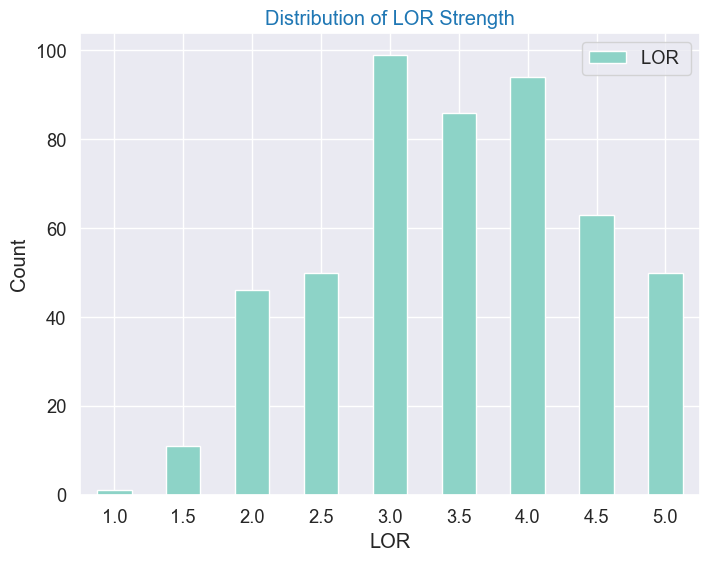

In [637]:
# Analyzing Letter of Recommendation(LOR) Strength
LOR = pd.DataFrame(dataset["LOR "].value_counts().sort_index())
print(LOR)

sns.set(font_scale=1.2)
LOR.plot(kind='bar', figsize=(8, 6), rot=0, colormap = 'Set3')
plt.xlabel("LOR", labelpad=5)
plt.ylabel("Count", labelpad=5)
plt.title("Distribution of LOR Strength", color = '#1f77b4');

# Comments on Result : Distribution of LOR Strength is mostly between 3.0 to 5.0

             CGPA
count  500.000000
mean     8.576440
std      0.604813
min      6.800000
25%      8.127500
50%      8.560000
75%      9.040000
max      9.920000


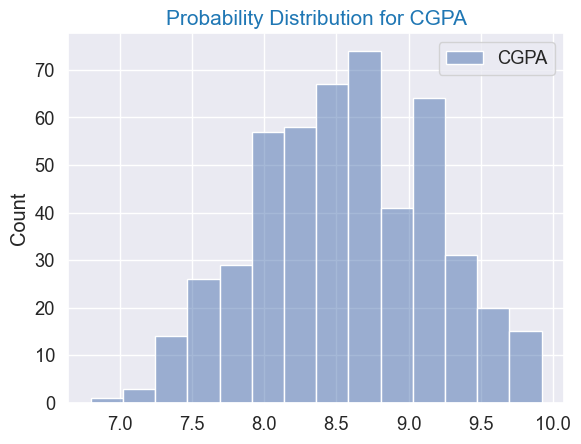

In [676]:
# Analyzing CGPA feature
CGPA = pd.DataFrame(dataset['CGPA'])

print(f'{CGPA.describe()}')

sns.histplot(CGPA).set_title('Probability Distribution for CGPA', color='#1f77b4', size='15')
plt.show()

# Comments on Result : Distribution of CGPA data is mostly between 8.0 to 9.2

   Research
0       220
1       280


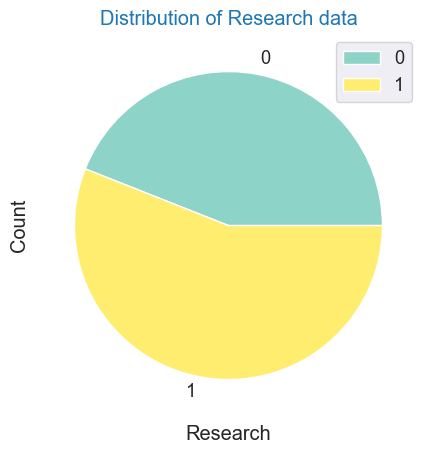

In [688]:
# Analyzing Research feature
research = pd.DataFrame(dataset["Research"].value_counts().sort_index())
print(research)

sns.set(font_scale=1.2)
research.plot(kind='pie', figsize=(5, 5), colormap = 'Set3', subplots=True)
plt.xlabel("Research", labelpad=5)
plt.ylabel("Count", labelpad=5)
plt.title("Distribution of Research data", color = '#1f77b4');

# Comments on Result : The available records for each Reasearch type does not have a major difference

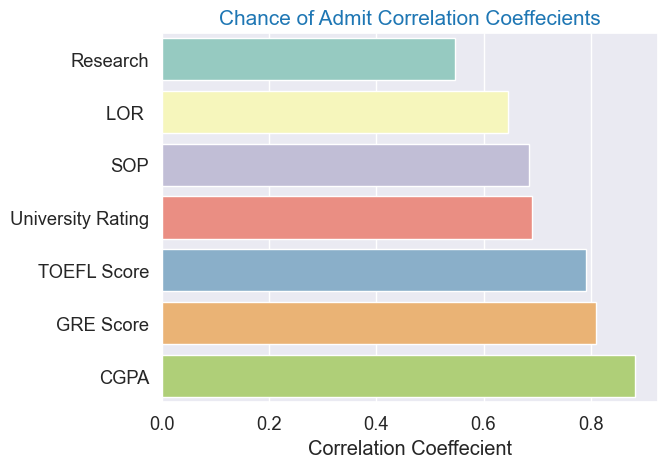

In [701]:
# Analysis of Chance of Admit


target_corr = pd.DataFrame(dataset.corr()['Chance of Admit '])
target_corr.rename({'Chance of Admit ': 'Correlation Coeffecient'}, axis=1, inplace=True)
target_corr.drop('Chance of Admit ', inplace=True)
target_corr.sort_values(['Correlation Coeffecient'], inplace=True)
target_corr_y = target_corr.index
target_corr_x = target_corr['Correlation Coeffecient']
sns.barplot(y=target_corr_y,x=target_corr_x, palette='Set3').set_title('Chance of Admit Correlation Coeffecients', size='15', color = '#1f77b4')
plt.show()

# Comments on Result : Chanse of Admit is having high correlation with CGPA, GRE Score and TOEFL Score 

## Separating Independent and Dependent Variables 

In [296]:
# Input Dataset or the features of problem
X = dataset.drop("Chance of Admit ", axis=1)
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [297]:
# Output Dataset or the target of problem
y = dataset["Chance of Admit "]
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

Text(0.5, 1.0, 'Correlation between variables')

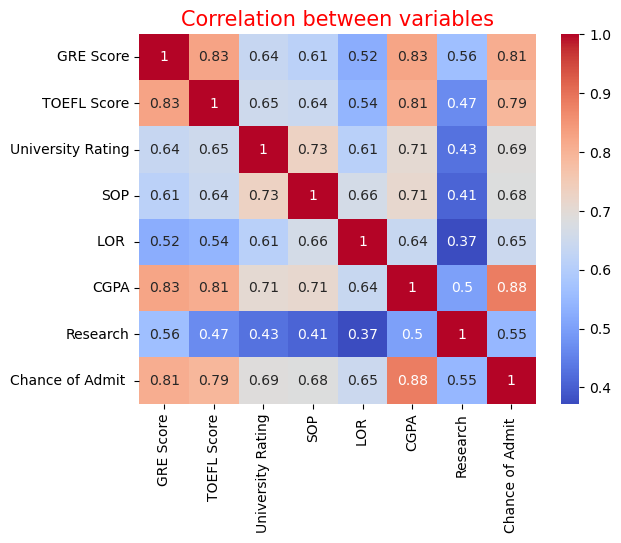

In [487]:
# Plotting the correlation between input dataset variables/features
sns.heatmap(dataset.corr(), annot=True, cmap = "coolwarm").set_title('Correlation between all variables', color='red', size='15')

# Comments on Result : Chance of Admit is having strong direct correlation with GRE Score, TOEFL Score and CGPA 

## Spilitting Training and Testing sets 

In [299]:
# Spilitting the dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
X_train, X_test, y_train, y_test
# Comments on Result: 20% of the data will be set aside for Testing purpose 

(     GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research
 238        310          104                  3  2.0   3.5  8.37         0
 438        318          110                  1  2.5   3.5  8.54         1
 475        300          101                  3  3.5   2.5  7.88         0
 58         300           99                  1  3.0   2.0  6.80         1
 380        322          104                  3  3.5   4.0  8.84         1
 ..         ...          ...                ...  ...   ...   ...       ...
 255        307          110                  4  4.0   4.5  8.37         0
 72         321          111                  5  5.0   5.0  9.45         1
 396        325          107                  3  3.0   3.5  9.11         1
 235        326          111                  5  4.5   4.0  9.23         1
 37         300          105                  1  1.0   2.0  7.80         0
 
 [400 rows x 7 columns],
      GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Researc

## Preprocessing

In [300]:
# Fearure Scaling

#scaler = StandardScaler() 
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train, X_test
# Note : Feature Scaling put the data into same scale and it is import for ML algorithms use distances like SVM, Logistic Regression, KNN, etc.

(array([[0.4       , 0.42857143, 0.5       , ..., 0.57142857, 0.50320513,
         0.        ],
        [0.56      , 0.64285714, 0.        , ..., 0.57142857, 0.55769231,
         1.        ],
        [0.2       , 0.32142857, 0.5       , ..., 0.28571429, 0.34615385,
         0.        ],
        ...,
        [0.7       , 0.53571429, 0.5       , ..., 0.57142857, 0.74038462,
         1.        ],
        [0.72      , 0.67857143, 1.        , ..., 0.71428571, 0.77884615,
         1.        ],
        [0.2       , 0.46428571, 0.        , ..., 0.14285714, 0.32051282,
         0.        ]]),
 array([[ 0.46      ,  0.5       ,  0.25      ,  0.375     ,  0.14285714,
          0.5224359 ,  0.        ],
        [ 0.44      ,  0.53571429,  0.5       ,  0.5       ,  0.42857143,
          0.53205128,  1.        ],
        [ 0.98      ,  0.96428571,  1.        ,  0.875     ,  0.71428571,
          0.92948718,  0.        ],
        [ 0.52      ,  0.53571429,  0.25      ,  0.625     ,  0.57142857,
     

# Regression Models
## 1. Regression using Linear Regression

In [301]:
# Prediction using Regression Models
# Note : We will first use regression model as our target variable : 'Chance of Admit' is having continuous values

# Linear Regression Model
lin_regressor = LinearRegression()

# Training the model
lin_regressor.fit(X_train, y_train)

# Predicting the results for trained Linear Regression Model
y_pred_lr = lin_regressor.predict(X_test)
print(f'Prediction Results of Linear Regression Model : \n\n{y_pred_lr}\n\n')

# Calculating Accuracy of Linear Regression Model
accuracy_lr = metrics.r2_score(y_test, y_pred_lr) * 100
print(f'Accuracy of Linear Regression Model : {accuracy_lr} %')

Prediction Results of Linear Regression Model : 

[0.65364463 0.70043542 0.94400884 0.73135825 0.81719181 0.66513709
 0.74546219 0.71398256 0.78873127 0.65653766 0.66883172 0.56215153
 0.78221604 0.79560121 0.77166888 0.85777014 0.62918292 0.76196454
 0.89748589 0.67181012 0.62843768 0.79390017 0.84201562 0.59214465
 0.78876323 0.5688167  0.95161786 0.64436779 0.86027013 0.71082762
 0.63334096 0.81502112 0.59773752 0.91046031 0.5079117  0.81814977
 0.68720131 0.63320441 0.65956114 0.91169813 0.56572719 0.66078745
 0.77234455 0.97095744 0.77180606 0.52235571 0.66698457 0.63029872
 0.65362771 0.66061792 0.83352993 0.91851356 0.87827235 0.61929821
 0.76833342 0.64295764 0.74767251 0.60334621 0.6594083  0.69646847
 0.4376351  0.72186637 0.75307031 0.84912984 0.98015564 0.61054881
 0.73186256 0.77395027 0.94143227 0.70255514 0.60282575 0.65413563
 0.82416213 0.49104946 0.92578896 0.59736765 0.83680077 0.94078823
 0.71119566 0.7686843  0.83476616 0.50992057 0.9158392  0.78936354
 0.79910119 

## 2. Regression using Support Vector Machine

In [302]:
# Support Vector Machine Regression Model
svm_regressor = SVR(C=0.1)

# Training the model
svm_regressor.fit(X_train, y_train)

# Predicting the results for trained Support Vector Regression Model
y_pred_svr = svm_regressor.predict(X_test)
print(f'Prediction Results of Support Vector Regression Model : \n\n{y_pred_svr}\n\n')

# Calculating Accuracy of Support Vector Regression Model
accuracy_svr = metrics.r2_score(y_test, y_pred_svr) * 100
print(f'Accuracy of Support Vector Regression Model : {accuracy_svr} %')

Prediction Results of Support Vector Regression Model : 

[0.65047064 0.67601718 0.76869573 0.70175084 0.8159094  0.63004579
 0.705501   0.69803768 0.7706371  0.65547797 0.65403625 0.60031395
 0.73989998 0.72613658 0.75355518 0.82735927 0.60548214 0.71527891
 0.85924692 0.62019158 0.59870999 0.76589071 0.82262913 0.63754816
 0.72752196 0.58470862 0.85885903 0.62226093 0.8383632  0.69693463
 0.59454149 0.7919165  0.57473231 0.87516249 0.56147368 0.79296367
 0.64158031 0.60309039 0.64276723 0.87036942 0.52449309 0.65363878
 0.7351311  0.87794591 0.76664232 0.52073467 0.63143675 0.61994163
 0.63894626 0.64975212 0.83183017 0.86493963 0.83837553 0.6054404
 0.70557367 0.61940571 0.74401995 0.60636101 0.65916126 0.68012639
 0.53542406 0.67713141 0.7138657  0.83327156 0.87160627 0.59475503
 0.72066351 0.76380163 0.86357622 0.67384308 0.56831566 0.62207709
 0.79127208 0.51293421 0.86097215 0.60643264 0.82063282 0.84079974
 0.67097454 0.75561809 0.80844213 0.54272521 0.86648962 0.77620907
 0.73

## 3. Regression using Random Forest

In [867]:
# Random Forest Regression Model
rf_regressor = RandomForestRegressor(n_estimators=50)

# Training the model
rf_regressor.fit(X_train, y_train)

# Predicting the results for trained Random Forest Regression Model
y_pred_rfr = rf_regressor.predict(X_test)
print(f'Prediction Results of Random Forest Regression Model : \n\n{y_pred_rfr}\n\n')

# Calculating Accuracy of Random Forest Regression Model
accuracy_rfr = metrics.r2_score(y_test, y_pred_rfr) * 100
print(f'Accuracy of Random Forest Regression Model : {accuracy_rfr} %')

Prediction Results of Random Forest Regression Model : 

[0.6034 0.686  0.947  0.7284 0.8242 0.6934 0.7604 0.633  0.7882 0.6806
 0.671  0.5078 0.8058 0.7768 0.7658 0.884  0.6486 0.7916 0.9282 0.6858
 0.6622 0.7392 0.8326 0.5548 0.7972 0.61   0.9572 0.679  0.8858 0.661
 0.6352 0.8126 0.5846 0.9168 0.5448 0.7928 0.6614 0.6422 0.678  0.9302
 0.5666 0.6936 0.7358 0.9638 0.7738 0.5334 0.659  0.6574 0.6868 0.6938
 0.8276 0.9192 0.9152 0.5832 0.7576 0.6564 0.7384 0.5914 0.6968 0.7056
 0.4432 0.7214 0.7488 0.8612 0.9594 0.6124 0.7176 0.7568 0.9302 0.6654
 0.5998 0.6678 0.8046 0.5452 0.9188 0.5456 0.8602 0.9478 0.7094 0.7482
 0.875  0.5416 0.9304 0.7714 0.8598 0.677  0.8838 0.9166 0.5436 0.6332
 0.6572 0.7832 0.5984 0.6942 0.8022 0.821  0.8442 0.6232 0.6972 0.6428]


Accuracy of Random Forest Regression Model : 77.16124074361763 %


## 4. Regression using Gradient Boosting

In [864]:
# Gradient Boosting Regression Model
gb_regressor = GradientBoostingRegressor(n_estimators=85)

# Training the model
gb_regressor.fit(X_train, y_train)

# Predicting the results for trained Gradient Boosting Regression Model
y_pred_gbr = gb_regressor.predict(X_test)
print(f'Prediction Results of Gradient Boosting Regression Model : \n\n{y_pred_gbr}\n\n')

# Calculating Accuracy of Random Forest Regression Model
accuracy_gbr = metrics.r2_score(y_test, y_pred_gbr) * 100
print(f'Accuracy of Gradient Boosting Regression Model : {accuracy_gbr} %')

Prediction Results of Gradient Boosting Regression Model : 

[0.66431832 0.68653287 0.93701313 0.72702852 0.82028311 0.68174739
 0.76177841 0.68312145 0.78660756 0.65666992 0.67555984 0.51800429
 0.80003009 0.76967558 0.76271355 0.87886833 0.65561955 0.75870596
 0.92162016 0.66578661 0.69516877 0.74780467 0.8033758  0.55248324
 0.7813968  0.60244456 0.94278612 0.66461395 0.88515858 0.68164091
 0.64118539 0.82941345 0.6104655  0.92499235 0.60533728 0.81075403
 0.66447862 0.64838087 0.68073676 0.93215169 0.54323093 0.68628706
 0.73435008 0.9569893  0.74655359 0.52494667 0.66123142 0.63872387
 0.68562097 0.67120936 0.82633411 0.93089824 0.90902997 0.59362888
 0.77294978 0.63744411 0.74026498 0.62240099 0.66385057 0.6962039
 0.4252616  0.73718046 0.75648394 0.87106256 0.96282519 0.63679607
 0.71856308 0.76699824 0.93315792 0.67772072 0.59900061 0.68005933
 0.81364712 0.51692539 0.91166986 0.59969253 0.85437136 0.92211785
 0.71413931 0.7511004  0.86653138 0.50548613 0.93055486 0.75976748
 0

## 5. Regression using Artificial Neural Network 

In [419]:
# Using Artificial Neural Network Model (Regression)
ann_model = Sequential()

# Adding Layers
ann_model.add(Dense(7,activation = "relu" , input_dim = 7))
ann_model.add(Dense(7,activation = "relu"))
ann_model.add(Dense(1,activation = "linear"))

In [420]:
ann_model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_58 (Dense)            (None, 7)                 56        
                                                                 
 dense_59 (Dense)            (None, 7)                 56        
                                                                 
 dense_60 (Dense)            (None, 1)                 8         
                                                                 
Total params: 120
Trainable params: 120
Non-trainable params: 0
_________________________________________________________________


In [421]:
# Compiling the model
ann_model.compile(loss = "mean_squared_error", optimizer = "Adam")

In [422]:
# Training the model
history = ann_model.fit(X_train, y_train, epochs = 250, validation_split = 0.2)

Epoch 1/250
10/10 [==============================] - 1s 25ms/step - loss: 0.5506 - val_loss: 0.5176
Epoch 2/250
10/10 [==============================] - 0s 7ms/step - loss: 0.4376 - val_loss: 0.4144
Epoch 3/250
10/10 [==============================] - 0s 6ms/step - loss: 0.3483 - val_loss: 0.3245
Epoch 4/250
10/10 [==============================] - 0s 8ms/step - loss: 0.2687 - val_loss: 0.2431
Epoch 5/250
10/10 [==============================] - 0s 8ms/step - loss: 0.1965 - val_loss: 0.1708
Epoch 6/250
10/10 [==============================] - 0s 6ms/step - loss: 0.1341 - val_loss: 0.1104
Epoch 7/250
10/10 [==============================] - 0s 5ms/step - loss: 0.0844 - val_loss: 0.0664
Epoch 8/250
10/10 [==============================] - 0s 7ms/step - loss: 0.0505 - val_loss: 0.0393
Epoch 9/250
10/10 [==============================] - 0s 5ms/step - loss: 0.0315 - val_loss: 0.0256
Epoch 10/250
10/10 [==============================] - 0s 7ms/step - loss: 0.0231 - val_loss: 0.0204
Epoch 11

10/10 [==============================] - 0s 5ms/step - loss: 0.0039 - val_loss: 0.0044
Epoch 84/250
10/10 [==============================] - 0s 6ms/step - loss: 0.0039 - val_loss: 0.0044
Epoch 85/250
10/10 [==============================] - 0s 4ms/step - loss: 0.0038 - val_loss: 0.0044
Epoch 86/250
10/10 [==============================] - 0s 6ms/step - loss: 0.0038 - val_loss: 0.0044
Epoch 87/250
10/10 [==============================] - 0s 6ms/step - loss: 0.0039 - val_loss: 0.0044
Epoch 88/250
10/10 [==============================] - 0s 6ms/step - loss: 0.0038 - val_loss: 0.0045
Epoch 89/250
10/10 [==============================] - 0s 5ms/step - loss: 0.0039 - val_loss: 0.0044
Epoch 90/250
10/10 [==============================] - 0s 6ms/step - loss: 0.0038 - val_loss: 0.0044
Epoch 91/250
10/10 [==============================] - 0s 6ms/step - loss: 0.0039 - val_loss: 0.0044
Epoch 92/250
10/10 [==============================] - 0s 6ms/step - loss: 0.0039 - val_loss: 0.0043
Epoch 93/250


10/10 [==============================] - 0s 6ms/step - loss: 0.0034 - val_loss: 0.0038
Epoch 246/250
10/10 [==============================] - 0s 5ms/step - loss: 0.0034 - val_loss: 0.0038
Epoch 247/250
10/10 [==============================] - 0s 5ms/step - loss: 0.0034 - val_loss: 0.0038
Epoch 248/250
10/10 [==============================] - 0s 6ms/step - loss: 0.0034 - val_loss: 0.0038
Epoch 249/250
10/10 [==============================] - 0s 6ms/step - loss: 0.0034 - val_loss: 0.0038
Epoch 250/250
10/10 [==============================] - 0s 5ms/step - loss: 0.0034 - val_loss: 0.0038


In [426]:
# Predicting the result for the model
y_pred_ann = ann_model.predict(X_test)

4/4 [==============================] - 0s 2ms/step


In [430]:
# Calculating accuracies of the model
accuracy_ann = metrics.r2_score(y_test, y_pred_ann) * 100
print(f'Accuracy of ANN Model : {accuracy_ann} %')

Accuracy of ANN Model : 81.2685847327153 %


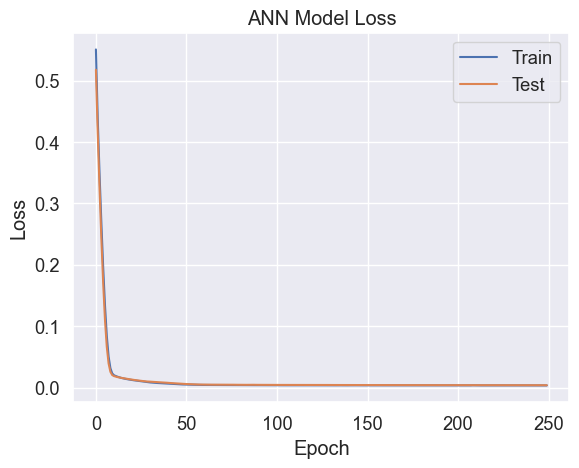

In [759]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('ANN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')

# Comments on Result : Both Training loss and validation loss are very similar so training and testing accuracies will also be same.

## Comparision of Regression Model Accuracies

In [868]:
results_regression = pd.DataFrame({'Regression Models' : ['Linear','SVR','RFR', 'GBR', 'ANN'],
                                  'Accuracies' : [accuracy_lr, accuracy_svr, accuracy_rfr, accuracy_gbr, accuracy_ann]})
results_regression

,Regression Models,Accuracies
0,Linear,82.087417
1,SVR,74.719868
2,RFR,77.161241
3,GBR,78.696357
4,ANN,81.268585


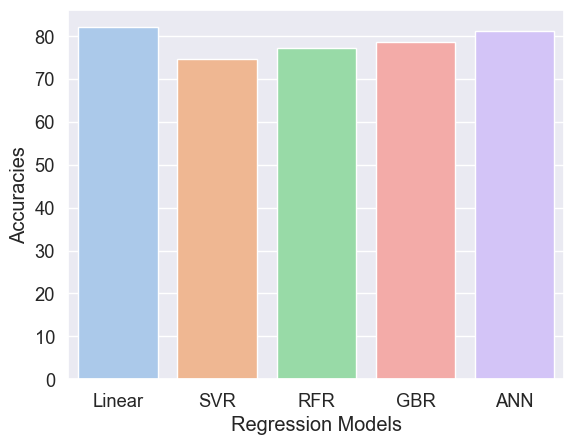

In [869]:
with sns.color_palette("pastel"):
    sns.barplot(x = results_regression['Regression Models'], y = results_regression['Accuracies'])

# Classification Models
## Preprocessing for Classification

In [662]:
# Prediction using Classification Problems

# Converting Target continuous variables from training dataset into categorical variables
y_train_cl = pd.cut(y_train, bins=[0,0.8,1.0], labels = ['Low', 'High'])
y_train_cl

238     Low
438     Low
475     Low
58      Low
380     Low
       ... 
255     Low
72     High
396    High
235    High
37      Low
Name: Chance of Admit , Length: 400, dtype: category
Categories (2, object): ['Low' < 'High']

In [663]:
# Converting Target continuous variables from testing dataset into categorical variables
y_test_cl = pd.cut(y_test, bins=[0,0.8,1.0], labels = ['Low', 'High'])
y_test_cl

304     Low
340     Low
47     High
67      Low
479     Low
       ... 
11     High
192    High
92      Low
221     Low
110     Low
Name: Chance of Admit , Length: 100, dtype: category
Categories (2, object): ['Low' < 'High']

In [664]:
y_train_cl.value_counts()
# Comments on Results : Now We have only 3 classes in target variable as below

Low     286
High    114
Name: Chance of Admit , dtype: int64

In [665]:
y_test_cl.value_counts()
# Comments on Results : Now We have only 3 classes in target variable as below

Low     72
High    28
Name: Chance of Admit , dtype: int64

In [666]:
np.array(y_train_cl)

array(['Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'High', 'High', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'High', 'Low', 'Low', 'High', 'Low', 'Low', 'High',
       'Low', 'Low', 'High', 'Low', 'Low', 'High', 'High', 'High', 'High',
       'High', 'Low', 'Low', 'Low', 'Low', 'High', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'High', 'Low', 'Low', 'High', 'Low',
       'High', 'Low', 'Low', 'High', 'High', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'High', 'Low', 'High', 'Low', 'Low',
       'Low', 'High', 'High', 'High', 'Low', 'Low', 'High', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'High', 'Low', 'Low',
       'Low', 'High', 'High', 'Low', 'Low', 'Low', 'High', 'Low', 'Low',
       'Low', 'Low', 'High', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'High', 'Low', 'High', 'Low', 'High', 'High', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'High', '

In [667]:
np.array(y_test_cl)

array(['Low', 'Low', 'High', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'High', 'Low', 'Low',
       'High', 'Low', 'Low', 'Low', 'High', 'Low', 'Low', 'Low', 'High',
       'Low', 'High', 'Low', 'Low', 'Low', 'Low', 'High', 'Low', 'High',
       'Low', 'Low', 'Low', 'High', 'Low', 'Low', 'Low', 'High', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'High', 'High', 'High', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'High', 'High', 'Low', 'Low', 'High', 'High', 'Low', 'Low', 'Low',
       'High', 'Low', 'High', 'Low', 'High', 'High', 'Low', 'High',
       'High', 'Low', 'High', 'Low', 'Low', 'Low', 'High', 'High', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'High', 'High', 'Low',
       'Low', 'Low'], dtype=object)

## 1. Classification using K-Nearest Neighbor 

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

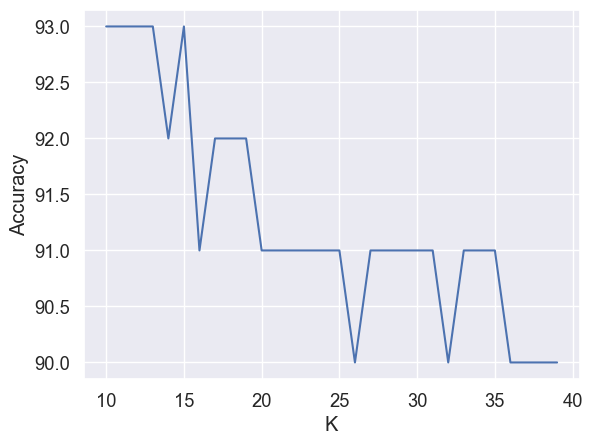

In [731]:
# K-Nearest Neighbor
# Checking which K gives the best results for knn
accuracies = []
for each in range(10,40):
    knn_temp = KNeighborsClassifier(n_neighbors = each)
    knn_temp.fit(X_train, y_train_cl)
    accuracies.append(knn_temp.score(X_test, y_test_cl) * 100)
    
plt.plot(range(10,40),accuracies)
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.show()

# Comments on result : we have the highest accuracy As for K=15 we have our high accuracy and then accuracy starts decreasing with increasing value of K, so we will choose K=15 for our model.

In [715]:
# K-Nearest Neighbor Classification Model
knn_classifier = KNeighborsClassifier(n_neighbors = 15)

# Training the model
knn_classifier.fit(X_train, y_train_cl)

# Predicting the results for trained Knn Model
y_pred_knn = knn_classifier.predict(X_test)
print(f'Prediction Results of K-Nearest Neighbor Classification Model : \n\n{y_pred_knn}\n\n')

# Calculating accuracy for Knn Model
accuracy_knn = metrics.accuracy_score(y_test_cl, y_pred_knn) * 100
print(f'Accuracy of K-Nearest Neighbor Classification Model : {accuracy_knn} %')

Prediction Results of K-Nearest Neighbor Classification Model : 

['Low' 'Low' 'Low' 'Low' 'High' 'Low' 'Low' 'Low' 'Low' 'Low' 'Low' 'Low'
 'Low' 'Low' 'Low' 'High' 'Low' 'Low' 'High' 'Low' 'Low' 'Low' 'High'
 'Low' 'Low' 'Low' 'High' 'Low' 'High' 'Low' 'Low' 'Low' 'Low' 'High'
 'Low' 'Low' 'Low' 'Low' 'Low' 'High' 'Low' 'Low' 'High' 'High' 'Low'
 'Low' 'Low' 'Low' 'Low' 'Low' 'High' 'High' 'High' 'Low' 'Low' 'Low'
 'Low' 'Low' 'Low' 'Low' 'Low' 'Low' 'Low' 'High' 'High' 'Low' 'Low'
 'High' 'High' 'Low' 'Low' 'Low' 'Low' 'Low' 'High' 'Low' 'High' 'High'
 'Low' 'Low' 'High' 'Low' 'High' 'High' 'Low' 'Low' 'High' 'High' 'Low'
 'Low' 'Low' 'Low' 'Low' 'Low' 'Low' 'High' 'High' 'Low' 'Low' 'Low']


Accuracy of K-Nearest Neighbor Classification Model : 93.0 %


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Confusion Matrix of k-Nearest Neighbor : 
[[24  4]
 [ 3 69]]


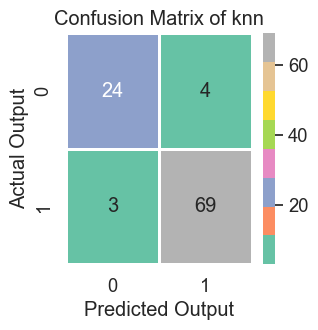

In [751]:
# Confusion Matrix of knn
cnm_knn = metrics.confusion_matrix(y_test_cl, y_pred_knn)

print(f'Confusion Matrix of k-Nearest Neighbor : \n{cnm_knn}')

# Plotting the confusion matrix
f, axes = plt.subplots(figsize =(3,3))
sns.heatmap(cnm_knn, annot = True, linewidths=1.0, linecolor="white", ax=axes, cmap = 'Set2')
plt.title("Confusion Matrix of knn")
plt.xlabel("Predicted Output")
plt.ylabel("Actual Output")
plt.show()

# Comments on Result : There very less number of false predictions than true predictions as per confusion matrix

## 2. Classification using Support Vector Machine

In [716]:
# Support Vector Classification Model
svm_classifier = SVC(C=1.0)

# Training the model
svm_classifier.fit(X_train, y_train_cl)

# Predicting the results for trained support vector classifier
y_pred_svc = svm_classifier.predict(X_test)
print(f'Prediction Results of Support Vector Classification Model : \n\n{y_pred_svc}\n\n')

# Calculating accuracies for support vector classifier
accuracy_svc = metrics.accuracy_score(y_test_cl, y_pred_svc) * 100
print(f'Accuracy of Support Vector Classification Model : {accuracy_svc} %')

Prediction Results of Support Vector Classification Model : 

['Low' 'Low' 'High' 'Low' 'High' 'Low' 'Low' 'Low' 'Low' 'Low' 'Low' 'Low'
 'Low' 'Low' 'Low' 'High' 'Low' 'Low' 'High' 'Low' 'Low' 'High' 'High'
 'Low' 'Low' 'Low' 'High' 'Low' 'High' 'Low' 'Low' 'Low' 'Low' 'High'
 'Low' 'Low' 'Low' 'Low' 'Low' 'High' 'Low' 'Low' 'Low' 'High' 'Low' 'Low'
 'Low' 'Low' 'Low' 'Low' 'High' 'High' 'High' 'Low' 'Low' 'Low' 'Low'
 'Low' 'Low' 'Low' 'Low' 'Low' 'Low' 'High' 'High' 'Low' 'Low' 'Low'
 'High' 'Low' 'Low' 'Low' 'Low' 'Low' 'High' 'Low' 'High' 'High' 'Low'
 'Low' 'High' 'Low' 'High' 'Low' 'Low' 'Low' 'High' 'High' 'Low' 'Low'
 'Low' 'Low' 'Low' 'Low' 'Low' 'High' 'High' 'Low' 'Low' 'Low']


Accuracy of Support Vector Classification Model : 94.0 %


Confusion Matrix of Support Vector Classifier : 
[[24  4]
 [ 2 70]]


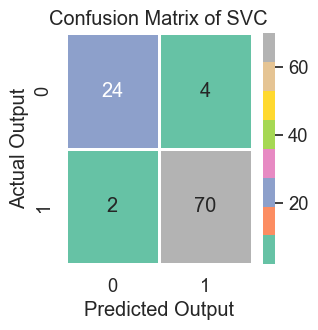

In [753]:
# Confusion Matrix of Suport Vector Classifier
cnm_svc = metrics.confusion_matrix(y_test_cl, y_pred_svc)

print(f'Confusion Matrix of Support Vector Classifier : \n{cnm_svc}')

# Plotting the confusion matrix
f, axes = plt.subplots(figsize =(3,3))
sns.heatmap(cnm_svc, annot = True, linewidths=1.0, linecolor="white", ax=axes, cmap = 'Set2')
plt.title("Confusion Matrix of SVC")
plt.xlabel("Predicted Output")
plt.ylabel("Actual Output")
plt.show()

# Comments on Result : There very less number of false predictions than true predictions as per confusion matrix

## 3. Classification using Random Forest

In [670]:
# Random Forest Classification Model
rf_classifier = RandomForestClassifier(n_estimators = 50)

# Training the model
rf_classifier.fit(X_train, y_train_cl)

# Predicting results for Random Forest Classifier
y_pred_rfc = rf_classifier.predict(X_test)
print(f'Prediction Results of Random Forest Classification Model : \n\n{y_pred_rfc}\n\n')

# Calculating accuracies for Random Forest Classifier
accuracy_rfc = metrics.accuracy_score(y_test_cl, y_pred_rfc) * 100
print(f'Accuracy of Random Forest Classification Model : {accuracy_rfc} %')

Prediction Results of Random Forest Classification Model : 

['Low' 'Low' 'High' 'Low' 'High' 'Low' 'Low' 'Low' 'Low' 'Low' 'Low' 'Low'
 'Low' 'Low' 'Low' 'High' 'Low' 'Low' 'High' 'Low' 'Low' 'Low' 'High'
 'Low' 'Low' 'Low' 'High' 'Low' 'High' 'Low' 'Low' 'High' 'Low' 'High'
 'Low' 'Low' 'Low' 'Low' 'Low' 'High' 'Low' 'Low' 'Low' 'High' 'Low' 'Low'
 'Low' 'Low' 'Low' 'Low' 'High' 'High' 'High' 'Low' 'Low' 'Low' 'Low'
 'Low' 'Low' 'Low' 'Low' 'Low' 'Low' 'High' 'High' 'Low' 'Low' 'Low'
 'High' 'Low' 'Low' 'Low' 'High' 'Low' 'High' 'Low' 'High' 'High' 'Low'
 'Low' 'High' 'Low' 'High' 'Low' 'High' 'Low' 'High' 'High' 'Low' 'Low'
 'Low' 'High' 'Low' 'Low' 'High' 'High' 'High' 'Low' 'Low' 'Low']


Accuracy of Random Forest Classification Model : 92.0 %


Confusion Matrix of Random Forest Classifier : 
[[25  3]
 [ 5 67]]


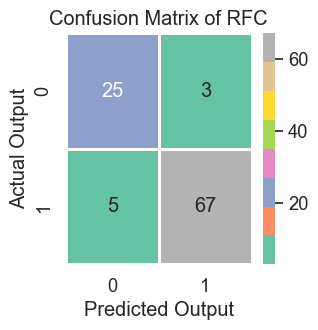

In [756]:
# Confusion Matrix of Random Forest Classifier
cnm_rfc = metrics.confusion_matrix(y_test_cl, y_pred_rfc)

print(f'Confusion Matrix of Random Forest Classifier : \n{cnm_rfc}')

# Plotting the confusion matrix
f, axes = plt.subplots(figsize =(3,3))
sns.heatmap(cnm_rfc, annot = True, linewidths=1.0, linecolor="white", ax=axes, cmap = 'Set2')
plt.title("Confusion Matrix of RFC")
plt.xlabel("Predicted Output")
plt.ylabel("Actual Output")
plt.show()

# Comments on Result : There comparatively less number of false predictions than true predictions as per confusion matrix

## 4. Classification using Gradient Boosting

In [671]:
# Gradient Boosting Classification Model
gb_classifier = GradientBoostingClassifier(n_estimators=85)

# Training the model
gb_classifier.fit(X_train, y_train_cl)

# Predicting results for Gradient Boosting Classifier
y_pred_gbc = gb_classifier.predict(X_test)
print(f'Prediction Results of Gradient Boosting Classification Model : \n\n{y_pred_gbc}\n\n')

# Calculating accuracies for Gredient boosting Classifier
accuracy_gbc = metrics.accuracy_score(y_test_cl, y_pred_gbc) * 100
print(f'Accuracy of Gradient Boosting Classification Model : {accuracy_gbc} %')

Prediction Results of Gradient Boosting Classification Model : 

['Low' 'Low' 'High' 'Low' 'Low' 'Low' 'Low' 'Low' 'Low' 'Low' 'Low' 'Low'
 'Low' 'Low' 'Low' 'High' 'Low' 'Low' 'High' 'Low' 'Low' 'Low' 'High'
 'Low' 'Low' 'Low' 'High' 'Low' 'High' 'Low' 'Low' 'High' 'Low' 'High'
 'Low' 'Low' 'Low' 'Low' 'Low' 'High' 'Low' 'Low' 'Low' 'High' 'Low' 'Low'
 'Low' 'Low' 'Low' 'Low' 'High' 'High' 'High' 'Low' 'Low' 'Low' 'Low'
 'Low' 'Low' 'Low' 'Low' 'Low' 'Low' 'High' 'High' 'Low' 'Low' 'High'
 'High' 'Low' 'Low' 'Low' 'High' 'Low' 'High' 'Low' 'High' 'High' 'Low'
 'Low' 'High' 'Low' 'High' 'Low' 'High' 'Low' 'High' 'High' 'Low' 'Low'
 'Low' 'High' 'Low' 'Low' 'High' 'Low' 'High' 'Low' 'Low' 'Low']


Accuracy of Gradient Boosting Classification Model : 93.0 %


Confusion Matrix of Gradient Boosting Classifier : 
[[25  3]
 [ 4 68]]


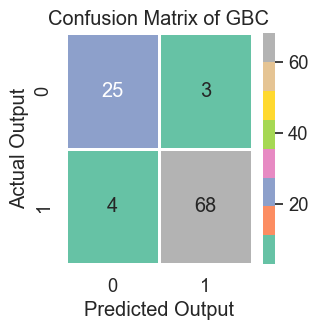

In [757]:
# Confusion Matrix of Gradient Boosting Classifier
cnm_gbc = metrics.confusion_matrix(y_test_cl, y_pred_gbc)

print(f'Confusion Matrix of Gradient Boosting Classifier : \n{cnm_gbc}')

# Plotting the confusion matrix
f, axes = plt.subplots(figsize =(3,3))
sns.heatmap(cnm_gbc, annot = True, linewidths=1.0, linecolor="white", ax=axes, cmap = 'Set2')
plt.title("Confusion Matrix of GBC")
plt.xlabel("Predicted Output")
plt.ylabel("Actual Output")
plt.show()

# Comments on Result : There comparatively less number of false predictions than true predictions as per confusion matrix

## Comparision of Classification Model Accuracies

In [717]:
# Summarizing the accuracies of all Classification Models
results_classification = pd.DataFrame({'Classification Models' : ['KNN','SVC','RFC', 'GBC'],
                                  'Accuracies' : [accuracy_knn ,accuracy_svc ,accuracy_rfc, accuracy_gbc]})
results_classification

,Classification Models,Accuracies
0,Knn,93.0
1,SVC,94.0
2,RFC,92.0
3,GBC,93.0


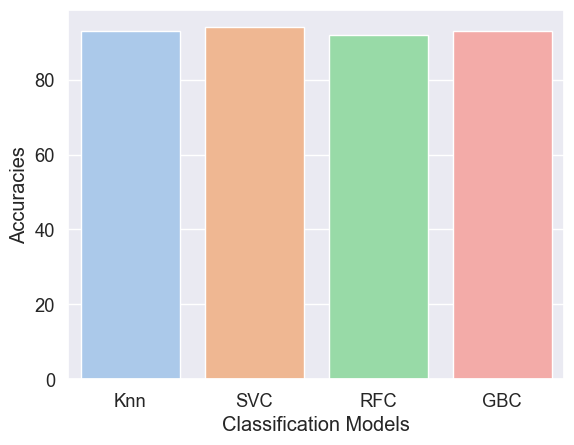

In [718]:
with sns.color_palette("pastel"):
    sns.barplot(x = results_classification['Classification Models'], y = results_classification['Accuracies'])

## Comparision of all the models

In [719]:
# Final comparision of all the models used so far

final_result = pd.DataFrame({'Models' : ['Linear Regressor','Support Vector Regressor','Random Forest Regressor', 'Gradient Boosting Regressor', 'Artificial Neural Network', 'K-Nearest Neighbor','Support Vector Classifier','Random Forest Classifier', 'Gradient Boosting Classifier'],
                                  'Accuracies' : [accuracy_lr, accuracy_svr, accuracy_rfr, accuracy_gbr, accuracy_ann, accuracy_knn, accuracy_svc, accuracy_rfc, accuracy_gbc]})
final_result

,Models,Accuracies
0,Linear Regressor,82.087417
1,Support Vector Regressor,74.719868
2,Random Forest Regressor,77.271735
3,Gradient Boosting Regressor,78.302427
4,Artificial Neural Network,81.268585
5,K-Nearest Neighbor,93.000000
6,Support Vector Classifier,94.000000
7,Random Forest Classifier,92.000000
8,Gradient Boosting Classifier,93.000000


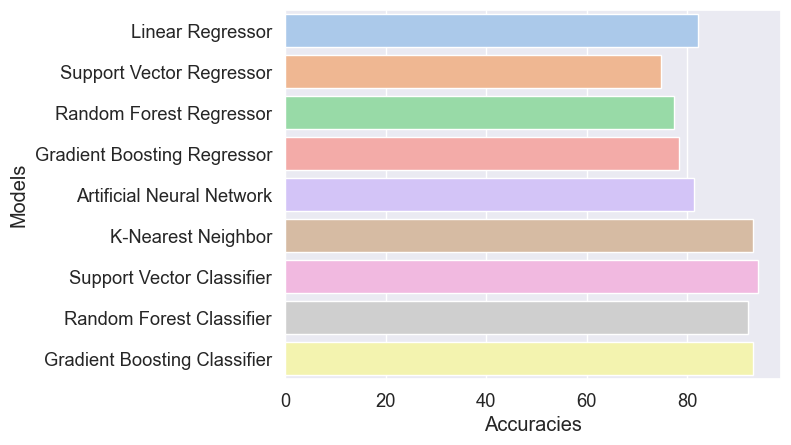

In [720]:
with sns.color_palette("pastel"):
    sns.barplot(y = final_result['Models'], x = final_result['Accuracies'])

## Saving the Best Models

In [527]:
# Comments on above results : As we can see in above graph, Support Vector Classifier has the maximum accuracy so we can use that model as our final model and save it to predict chance of admit for new data

# Saving the model for future use
# Printing our original set of input and output variables
print(X)
print(y)

     GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research
0          337          118                  4  4.5   4.5  9.65         1
1          324          107                  4  4.0   4.5  8.87         1
2          316          104                  3  3.0   3.5  8.00         1
3          322          110                  3  3.5   2.5  8.67         1
4          314          103                  2  2.0   3.0  8.21         0
..         ...          ...                ...  ...   ...   ...       ...
495        332          108                  5  4.5   4.0  9.02         1
496        337          117                  5  5.0   5.0  9.87         1
497        330          120                  5  4.5   5.0  9.56         1
498        312          103                  4  4.0   5.0  8.43         0
499        327          113                  4  4.5   4.5  9.04         0

[500 rows x 7 columns]
0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496 

In [528]:
# Converting entire y into categorical values
y_cl = pd.cut(y, bins=[0,0.8,1.0], labels = ['Low', 'High'])
y_cl = np.array(y_cl)
y_cl

array(['High', 'Low', 'Low', 'Low', 'Low', 'High', 'Low', 'Low', 'Low',
       'Low', 'Low', 'High', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'High', 'High', 'High', 'High', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'High', 'High', 'High', 'High',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'High', 'High',
       'High', 'High', 'High', 'High', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'High', 'High',
       'High', 'High', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'High', 'High', 'High', 'High', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'High', 'High',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'High', 'High',
       'High', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'High', 'High', 'Low', 'Low', 'L

In [529]:
# Scaling the entire input features
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.94      , 0.92857143, 0.75      , ..., 0.875     , 0.91346154,
        1.        ],
       [0.68      , 0.53571429, 0.75      , ..., 0.875     , 0.66346154,
        1.        ],
       [0.52      , 0.42857143, 0.5       , ..., 0.625     , 0.38461538,
        1.        ],
       ...,
       [0.8       , 1.        , 1.        , ..., 1.        , 0.88461538,
        1.        ],
       [0.44      , 0.39285714, 0.75      , ..., 1.        , 0.5224359 ,
        0.        ],
       [0.74      , 0.75      , 0.75      , ..., 0.875     , 0.71794872,
        0.        ]])

## Using the saved models to predict chances for new inputs

In [839]:
# Need to predict results for below 2 sets of inputs

# Input 1
GRE1 = 310
TOEFL1 = 115
UR1 = 4
SOP1 = 4.5
LOR1 = 5.0
CGPA1 = 9.2
research1 = 1

# Input 2
GRE2 = 300
TOEFL2 = 100
UR2 = 5
SOP2 = 4.5
LOR2 = 4.5
CGPA2 = 9.0
research2 = 0

In [840]:
# Creating Linear Regression Model as final Regressor
final_regressor = LinearRegression()

# Training the model on entire dataset
final_regressor.fit(X_scaled, y)

LinearRegression()

In [841]:
# Saving the regressor as "Graduate_Admission_Prediction_Regression" for future use
joblib.dump(final_regressor, "Graduate_Admission_Prediction_Regression")

['Graduate_Admission_Prediction_Regression']

In [842]:
# Loading "Graduate_Admission_Prediction_Regression" Regressor
admission_regressor = joblib.load("Graduate_Admission_Prediction_Regression") 

In [843]:
# Displaying Columns of original input data to know the sequence of input
X.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research'],
      dtype='object')

In [853]:
# Making prediction for random given feature data using Regressor
regression_pred1 = admission_regressor.predict(scaler.transform([[GRE1, TOEFL1, UR1, SOP1, LOR1, CGPA1, research1]]))
print(f'Chance of Admit is "{regression_pred1[0] * 100}  %"')

Chance of Admit is "84.85255252365344  %"


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [854]:
# Making prediction for random given feature data using Regressor
regression_pred2 = admission_regressor.predict(scaler.transform([[GRE2, TOEFL2, UR2, SOP2, LOR2, CGPA2, research2]]))
print(f'Chance of Admit is "{regression_pred2[0] * 100} %"')

Chance of Admit is "73.77983821053925 %"


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [855]:
# Creating Support Vector Classifier Model as final Classifier
final_classifier = SVC()

# Training the model on entire dataset
final_classifier.fit(X_scaled, y_cl)

SVC()

In [856]:
# Saving the classifier as "Graduate_Admission_Prediction_Classification" for future use
joblib.dump(final_classifier, "Graduate_Admission_Prediction_Classification")

['Graduate_Admission_Prediction_Classification']

In [857]:
# Loading "Graduate_Admission_Prediction_Classification" Classifier
admission_classifier = joblib.load("Graduate_Admission_Prediction_Classification") 

In [858]:
# Displaying Columns of original input data to know the sequence of input
X.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research'],
      dtype='object')

In [859]:
# Making prediction for random given feature data using Classifier
classification_pred1 = admission_classifier.predict(scaler.transform([[GRE1, TOEFL1, UR1, SOP1, LOR1, CGPA1, research1]]))
print(f'Chance of Admit is "{classification_pred1[0]}"')

Chance of Admit is "High"


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [860]:
# Making prediction for random given feature data using Classifier
classification_pred2 = admission_classifier.predict(scaler.transform([[GRE2, TOEFL2, UR2, SOP2, LOR2, CGPA2, research2]]))
print(f'Chance of Admit is "{classification_pred2[0]}"')

Chance of Admit is "Low"


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [861]:
# Showing the Final Result using both Regression and Classification on 2 new Inputs
output = pd.DataFrame({'GRE Score' : [GRE1, GRE2],
                       'TOEFL Score' : [TOEFL1, TOEFL2],
                       'University Rating' : [UR1, UR2],
                       'SOP' : [SOP1, SOP2],
                       'LOR' : [LOR1, LOR2],
                       'CGPA' : [CGPA1, CGPA2],
                       'Research' : [research1, research2],
                       'Chance of Admit(%)' : [regression_pred1[0] * 100 , regression_pred2[0] * 100],
                       'Chance of Admit(High/Low)' : [classification_pred1[0], classification_pred2[0]]})
output

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit(%),Chance of Admit(High/Low)
0,310,115,4,4.5,5.0,9.2,1,84.852553,High
1,300,100,5,4.5,4.5,9.0,0,73.779838,Low
